In [1]:
#Imports
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import scipy.integrate as integrate
from scipy.integrate import quad

In [2]:
#Constants
gamma = 0
h = 8.9                                                     #radial scale-length (kpc)
rc = 1.4                                                    #core radius (kpc)
G = 4.300e-6                                                #gravitational constant (kpc/solar mass*(km/s)^2)
rho00 = 0.31e9                                              #central surface density (solar mass/kpc^3)

In [3]:
#Equations from Casertano's Paper
rhat = lambda r,z: np.sqrt((r**2)+(z**2))                                         #r-hat from Casertano's eq(9)

rho = lambda r,rho00,rc: rho00*((1+((r/rc)**2))**(-1))                            #isothermal density profile
v0h = lambda r,rho00,rc,z,G: np.sqrt(rho(r,rho00,rc)*4*np.pi*G*(rhat(r,z)**2))    #eq 9 Casertano
vh = lambda r,rho00,rc,z,G,gamma: v0h(r,rho00,rc,z,G)*((r/rc)**gamma)             #eq 18 halo velocity from Casertano's paper
#vh = lambda r,rho00,rc,z,G: v0h(r,rho00,rc,z,G)                                  #eq 10 Casertano

print("r-hat at r=z=1:",rhat(1,1))
print("rho at r=1:",rho(1,rho00,rc))
print("Halo Velocity at ",vh(0.001,rho00,rc,0,G,gamma))

r-hat at r=z=1: 1.4142135623730951
rho at r=1: 205270270.27027026
Halo Velocity at  0.12942551325967705


In [4]:
#Variables

r = np.linspace(0, 25, 500)

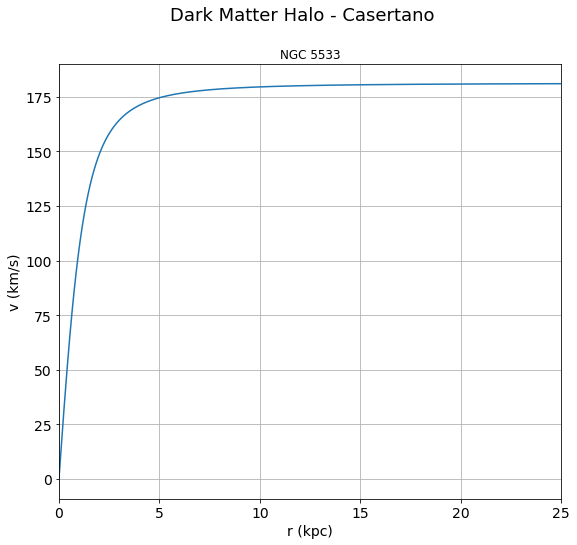

In [8]:
#plot orbital velocity for dark matter halo

fig = plt.figure(figsize=(9.0,8.0))                #size of the plot
ax = plt.axes()
ax.grid(True)
ax.yaxis.grid(True,which='minor',linestyle='--')

plt.plot(r, vh(r,rho00,rc,0,G,gamma), linestyle='solid', label='DM Velocity')          

fig.suptitle('Dark Matter Halo - Casertano', fontsize=18)
ax.set(title='NGC 5533')              #labeling axes
ax.set_xlim(0,25)
ax.set_xlabel('r (kpc)', fontsize=14)
ax.set_ylabel('v (km/s)', fontsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14);

plt.savefig('Outputs/DMVelocity.png')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


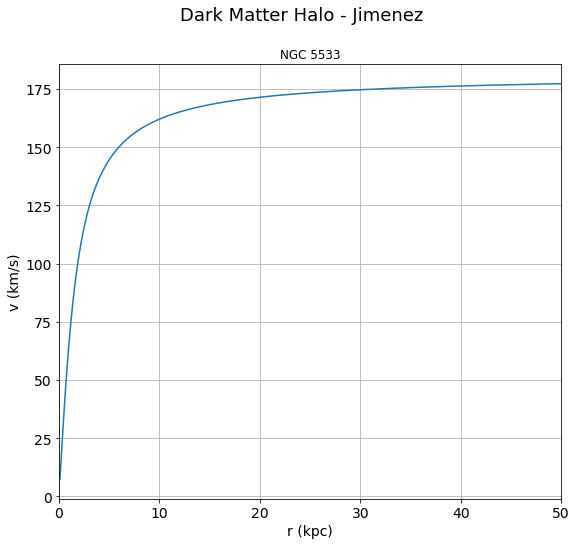

In [9]:
#isothermal density profile

#using a velocity equation from the paper "Dark halo properties from rotation curves" by Jimenez et.al.
vcdm = lambda r: np.sqrt(4*np.pi*G*rho00*(rc**2)*(1-((rc/r)*np.arctan(r/rc))))       #eq 9 from Jimenez paper

#Change variable r
r = np.linspace(0, 50, 500)

#plot orbital velocity for dark matter halo 
fig = plt.figure(figsize=(9.0,8.0))                #size of the plot
ax = plt.axes()
ax.grid(True)
ax.yaxis.grid(True,which='minor',linestyle='--')

plt.plot(r, vcdm(r), linestyle='solid', label='DM Velocity')

fig.suptitle('Dark Matter Halo - Jimenez', fontsize=18)
ax.set(title='NGC 5533')              #labeling axes
ax.set_xlim(0,50)
ax.set_xlabel('r (kpc)', fontsize=14)
ax.set_ylabel('v (km/s)', fontsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14);

plt.savefig('Outputs/DMVelocity2.png')

Mvir 1.7477453551675242e+185
rs 3.553329921083743e+78
rho_s 3.487041255446485e-36


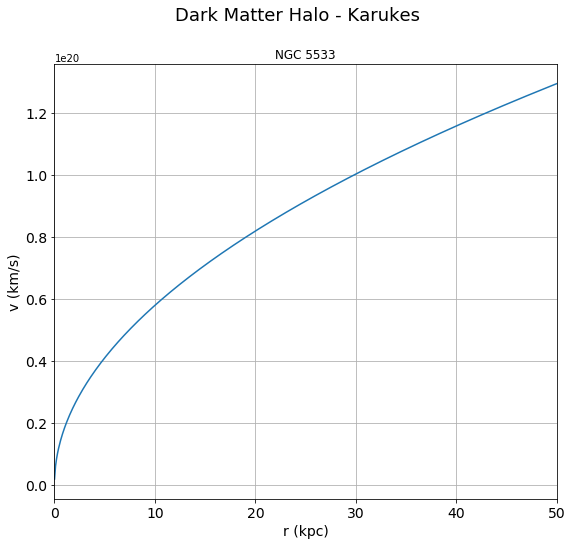

In [10]:
#different density functions and velocity equation by Karukes et.al.

#isothermal density profile
#rho = lambda r,rho00,rc: rho00*((1+((r/rc)**2))**(-1))      

#NFW density profile
c = 1e-12                                                  #c is the concentration parameter
rhocrit = 9.3e-18                                          #critical density of the Universe (kg/km^3)
#Mvir = 4/3)*np.pi*100*rhocrit*((c*rs)**3)                 #virial mass in section 3.2 and virial radius solved for c and rs
Mvir = 1e11*((c/(11.7))**(-40/3))                          #virial mass (in solar mass) solved from eq(5)
rs = (1/c)*(((3*Mvir)/((4*np.pi*100*rhocrit)))**(1/3))     #scale radius (kpc)
#Rvir = c*rs                                               #virial radius
rho_s = (100/3)*((c**3)/(np.log(1+c)-(c/(1+c))))*rhocrit   #characteristic density
rho = lambda r: rho_s/((r/rs)*((1+r/rs)**2))     

print("Mvir:",Mvir)
print("rs:",rs)
print("rho_s:",rho_s)

#Redefining variables
r = np.linspace(0.01, 50, 500)
R = np.linspace(0.01, 50, 500)

#Section 3.2 in Karukes paper
#f = lambda R: 4*np.pi*rho(R,rho00,rc)*(R**2)              #equation for isothermal density profile
f = lambda R: 4*np.pi*rho(R)*(R**2)                        #equation for NFW density profile
mdm = lambda r: quad(f, 0, r)[0]                           #instead of velocity v(r), I think this is the mass M(r)
vdm2 = lambda r: (G*mdm(r))/r                              #velocity squared: GM(r)/r)

vdm2v = np.vectorize(vdm2)
vdm = np.sqrt(vdm2v(r))                                     #velocity: sqrt(GM(r)/r)

#plot orbital velocity for dark matter halo 
fig = plt.figure(figsize=(9.0,8.0))                     #size of the plot
ax = plt.axes()
ax.grid(True)
ax.yaxis.grid(True,which='minor',linestyle='--')

plt.plot(r, vdm, linestyle='solid', label='DM Velocity')          

fig.suptitle('Dark Matter Halo - Karukes', fontsize=18)
ax.set(title='NGC 5533')                           #labeling axes
ax.set_xlim(0,50)
ax.set_xlabel('r (kpc)', fontsize=14)
ax.set_ylabel('v (km/s)', fontsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14);

plt.savefig('Outputs/DMVelocity3.png')